## Problem 4: Regression to the mean

When throwing two fair dice the probabilities of possible values are

- 2 or 12	1/36 = 2.8%
- 3 or 11	2/36 = 5.6%
- 4 or 10	3/36 = 8.3%
- 5 or 9	4/36 = 11.1%
- 6 or 8	5/36 = 13.9%
- 7	6/36 = 16.7%

The histogram looks like this.

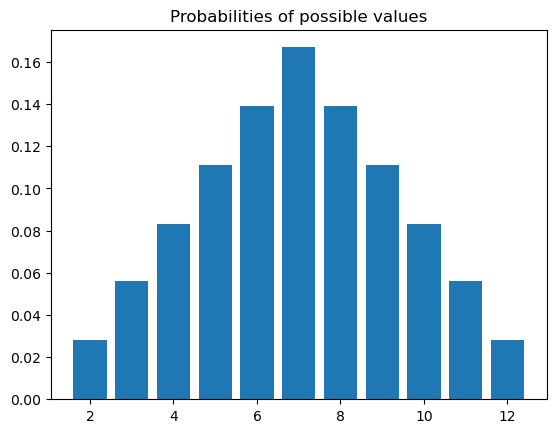

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nb = range(2,13)
freq = [0.028, 0.056, 0.083, 0.111, 0.139, 0.167, 0.139, 0.111, 0.083, 0.056, 0.028]
plt.bar(nb, freq)
plt.title("Probabilities of possible values")
plt.show()

Write a for loop which repeats the steps 1)-3) below for values of `n` ranging as
 - 500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000

1) Use numpy to simulate throwing of two dice `n` times. Compute the sum of the dice.

2) Use numpys `histogram()` function to compute the frequencies as `h,h2 = np.histogram(s,range(2,14))` where s contains the sum.

3) Use matplotlib's bar function to plot the histogram as `plt.bar(h2[:-1],h/n)` and show the value of n in the title.

4) What do you observe? You may need to run the loop a few times to see it.

5) How is this related to "regression to the mean"?

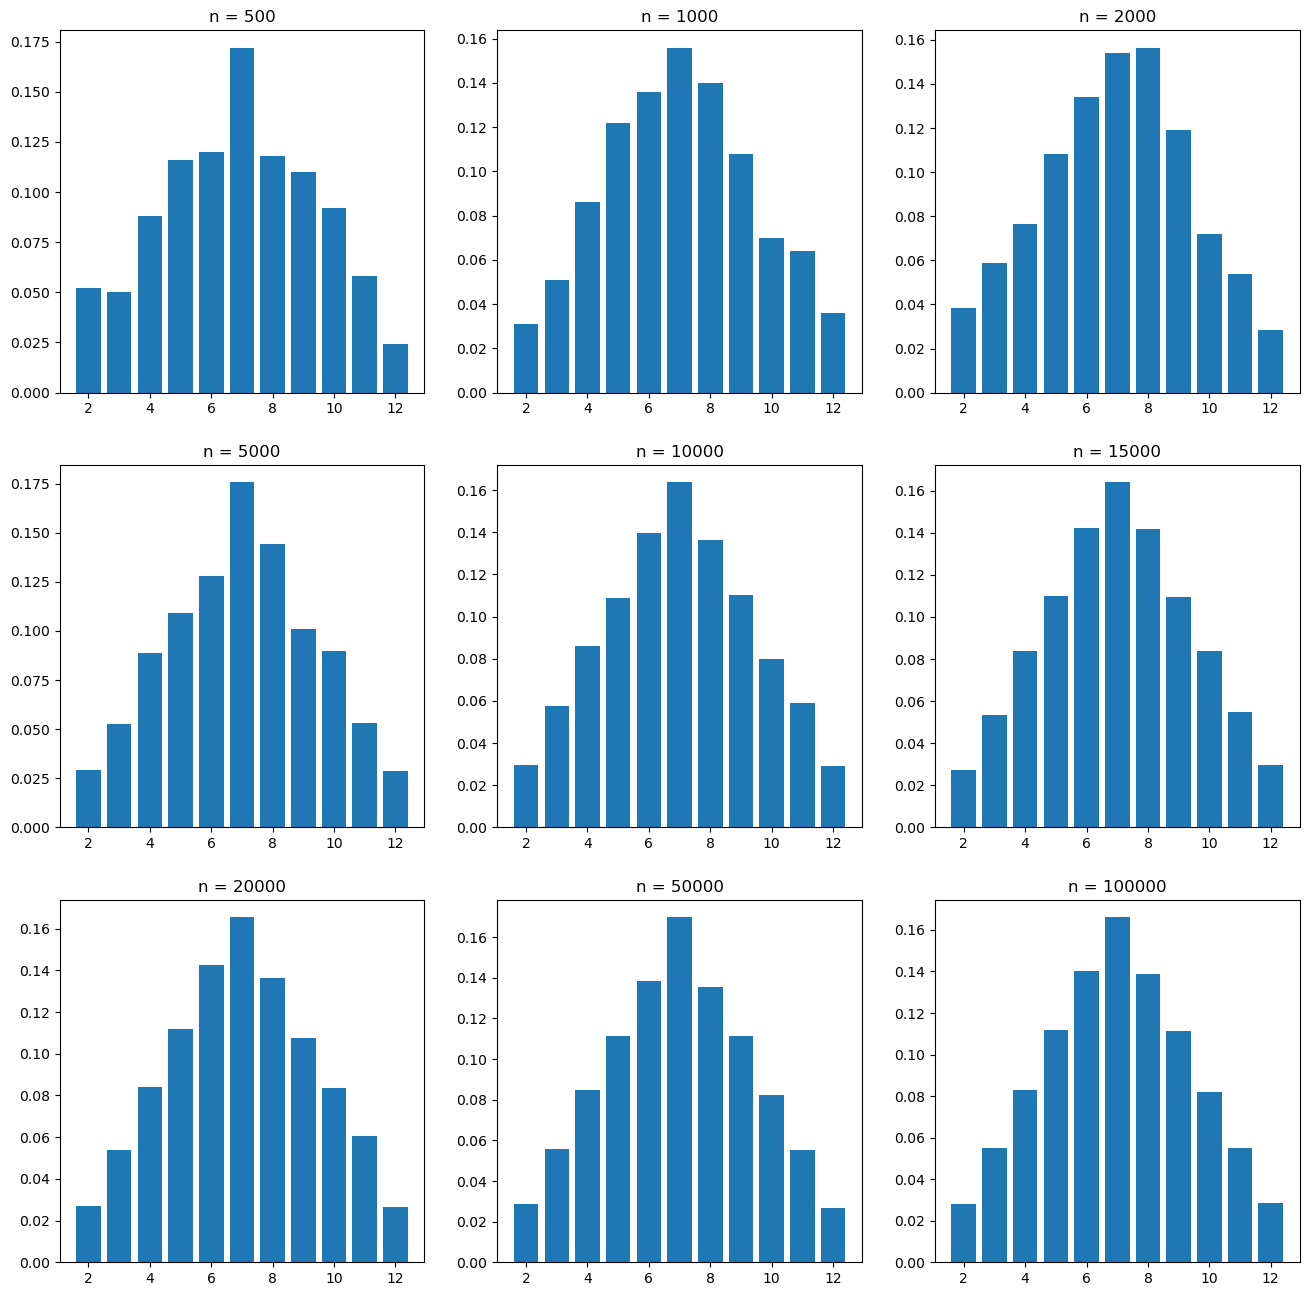

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nRange = [500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000]
fig, axs = plt.subplots(3,3, figsize = (16,16))
i = 0; j = 0

for n in nRange:
    diceOne = np.random.randint(1,7,n)
    diceTwo = np.random.randint(1,7,n)

    diceTot = diceOne + diceTwo

    h,h2 = np.histogram(diceTot, range(2,14) )
    axs[i,j].bar(h2[:-1],h/n)
    axs[i,j].set_title("n = {}".format(n))
    
    j += 1
    if j%3 == 0: j = 0; i += 1

We observe that as n increases, the graph looks more like the theoretical distribution above when throwing two fair dice. It is related to the "regression to the mean" due to the Law of Large Numbers. as `n` increases, the distribution of the sum of two dice thrown converges to its theoretical probabilities.

## Problem 5: Regression model
Consider the data from the file weight-height.csv.

1) Inspect the dependence between height and weight using a scatter plot. You may use either of the variables as independent variable.
2) Choose appropriate model for the dependence
3) Perform regression on the data using your model of choice
4) Plot the results
5) Compute RMSE and R2 value
6) Assess the quality of the regression (visually and using numbers) in your own words.

You are not required to split the dataset into training and testing sets. Of course you are completely free to experiment it here already.

It is recommended that you use the module sklearn for all your computations.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

We first import the data

In [4]:
path = os.path.join(os.getcwd(), "data/weight-height.csv")
df = pd.read_csv(path)
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


I convert them into SI units

In [5]:
df.Height = df.Height*2.54
df.Weight = df.Weight*0.4535924
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.721082
1,Male,174.706036,73.622797
2,Male,188.239668,96.497635
3,Male,182.196685,99.809592
4,Male,177.499761,93.598701


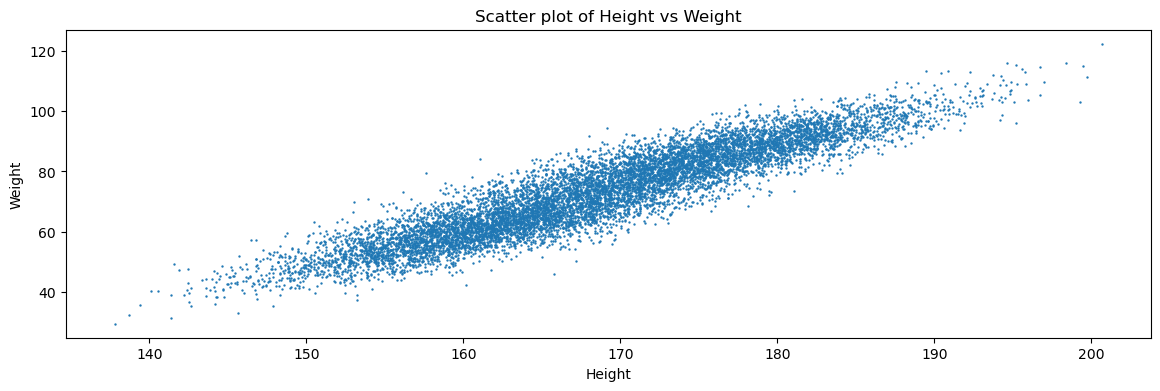

In [6]:
plt.figure(figsize=(14,4))
plt.scatter(df.Height, df.Weight, s=0.5)
plt.title("Scatter plot of Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

It looks like there is a linear relationship between `height` and `weight`

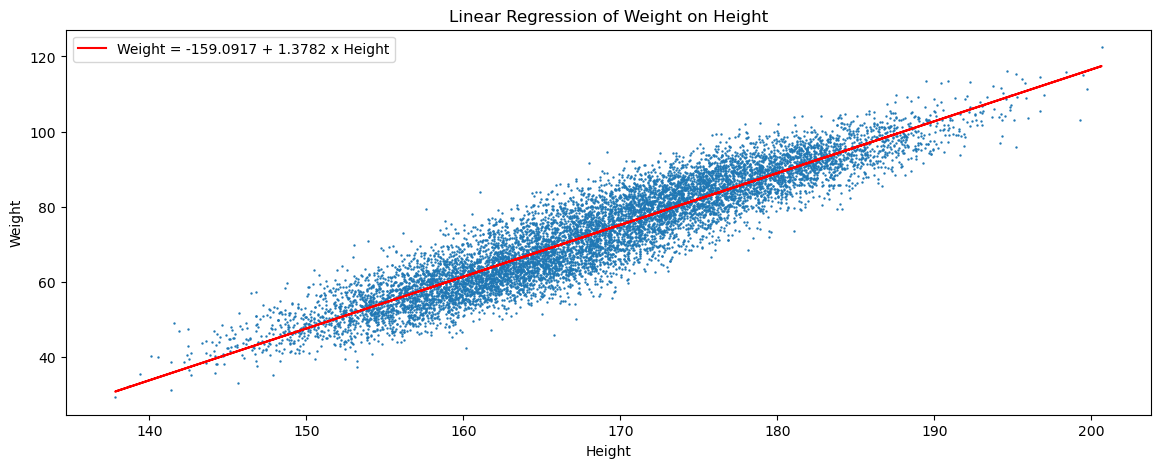

In [7]:
from sklearn import linear_model, metrics

model = linear_model.LinearRegression()

x = np.array(df.Height).reshape(-1,1)
y = np.array(df.Weight).reshape(-1,1)
model.fit(x,y)

b = model.coef_[0][0]
a = model.intercept_[0]

ypred = model.predict(x)

plt.figure(figsize=(14,5))
plt.plot(x, ypred, c='r')
plt.scatter(x,y, s=0.5)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Weight = {:.4f} + {:.4f} x Height".format(a,b)])
plt.title("Linear Regression of Weight on Height")
plt.show()

Let's compute $RMSE$ and $R^2$

In [8]:
print("RMSE : {}".format(metrics.root_mean_squared_error(y,ypred)))
print('R2:    {}'.format(metrics.r2_score(y,ypred)))

RMSE : 5.542251068212216
R2:    0.8551742120609958


We observe a dense scatter points around the linear regression line illustrating a strong correlation between Weight and Height. It is evidenced by its coefficient of determination $R^2$ of 0.85 close to 1.